## The goal of collecting this dataset:
The goal of collecting the Student Stress Factors dataset is to conduct a comprehensive analysis of the factors contributing to student stress, with a focus on classifying students into different stress levels and clustering them based on common stress-related characteristics. By examining variables such as academic workload, personal life, social pressures, and mental health, this dataset aims to identify patterns and relationships that can classify students’ stress levels. Additionally, clustering techniques will be used to group students with similar stress profiles, which can provide insights for developing targeted strategies to reduce stress, improve well-being, and enhance academic performance.

## The source of the dataset:
https://www.kaggle.com/datasets/rxnach/student-stress-factors-a-comprehensive-analysis

In [63]:
import pandas as pd
df = pd.read_csv('Dataset/StressLevelDataset(in).csv' )

## General information about the dataset:
Number of attributes: 21

Number of objects: 1100

Attribute types: All columns are integer types (int64)

Class label: stress_level

In [64]:
num_objects = len(df)
attributes_info = pd.DataFrame({
    'Attribute Name': df.columns,
    'Data Type': df.dtypes.values
})
print(f"Number of attributes: {len(df.columns)}")
print("\n")
print("Attributes and their types:")
print(attributes_info)
print("\n")
print(f"Number of objects: {num_objects}")

Number of attributes: 21


Attributes and their types:
                  Attribute Name Data Type
0                  anxiety_level     int64
1                    self_esteem     int64
2          mental_health_history     int64
3                     depression     int64
4                       headache     int64
5                 blood_pressure     int64
6                  sleep_quality     int64
7              breathing_problem     int64
8                    noise_level   float64
9              living_conditions   float64
10                        safety     int64
11                   basic_needs     int64
12          academic_performance     int64
13                    study_load   float64
14  teacher_student_relationship     int64
15        future_career_concerns     int64
16                social_support     int64
17                 peer_pressure     int64
18    extracurricular_activities     int64
19                      bullying     int64
20                  stress_level     int64

#### Check the Current Distribution of the Class Label:

In [65]:
# Check the current distribution of the class label (e.g., 'stress_level')
class_distribution = df['stress_level'].value_counts(normalize=True) * 100
print("Class label distribution in the full dataset:")
print(class_distribution)

Class label distribution in the full dataset:
stress_level
0    33.909091
2    33.545455
1    32.545455
Name: proportion, dtype: float64


### Graphs:
#### Histograms

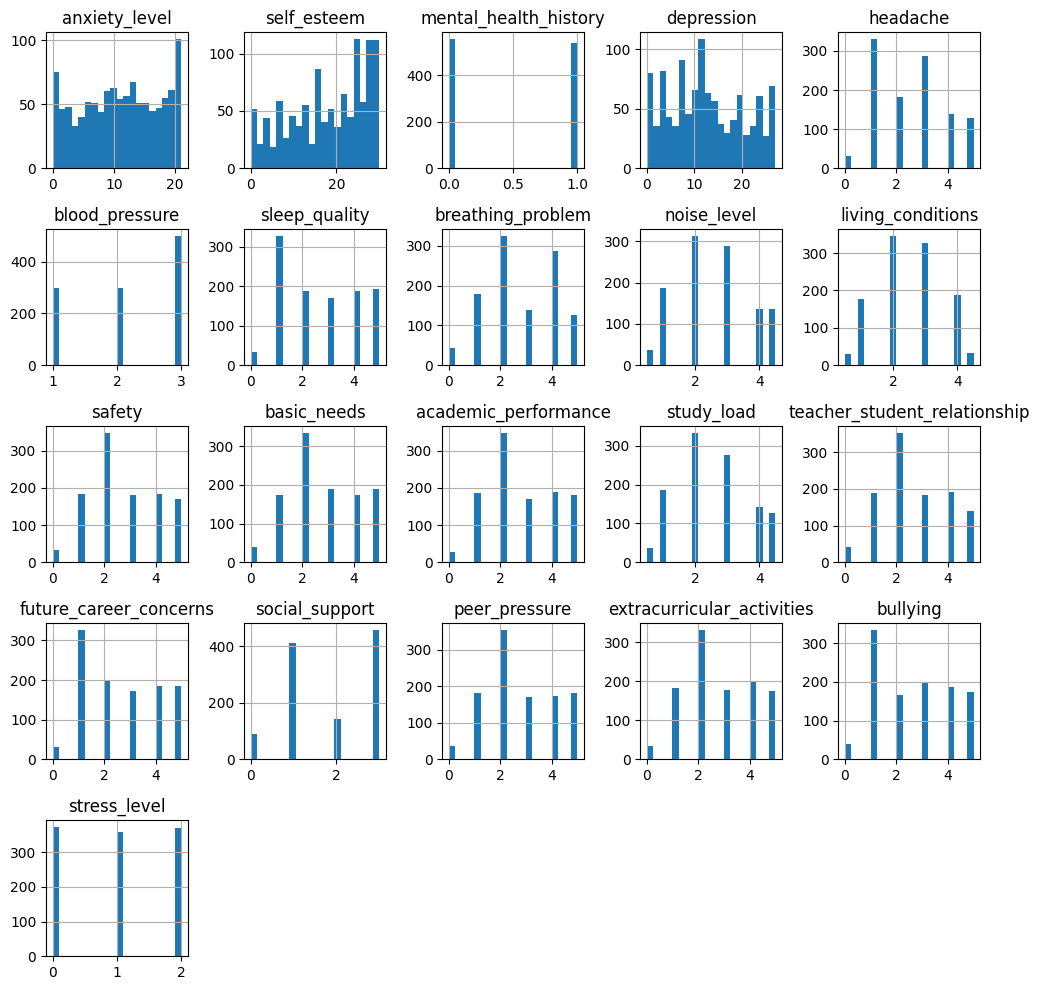

In [66]:
# Plot histograms for all numerical columns
import matplotlib.pyplot as plt
df.hist(figsize=(10, 10), bins=20) # Create a histogram for all numeric variables in the DataFrame

plt.tight_layout() # Adjust layout to prevent overlap of plots

plt.show() # Display the histograms

#### Bar chart

stress_level
0    33.909091
2    33.545455
1    32.545455
Name: proportion, dtype: float64


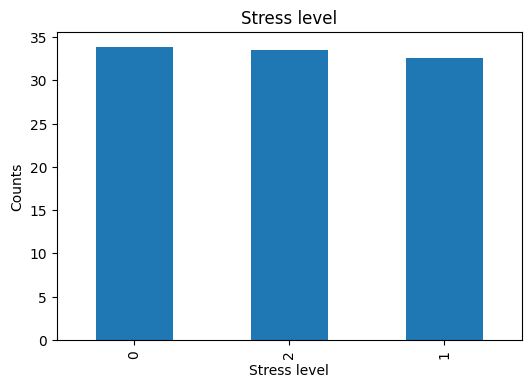

In [67]:
# plot to show distribution of the class label 
print(class_distribution)
plt.figure(figsize=(6, 4))
class_distribution.plot(kind='bar')
plt.title('Stress level')
plt.xlabel('Stress level')
plt.ylabel('Counts')
plt.show()

This bar chart shows that the dataset contains equal amounts of data for each stress level. This is good because it avoids issues related to class imbalance, where one category dominates the dataset and can skew analysis or model predictions. For example, if there were many more entries for “low stress” than “high stress,” a predictive model might learn to favor predicting “low stress” more often. But with balanced data, such biases are avoided.

<Axes: ylabel='proportion'>

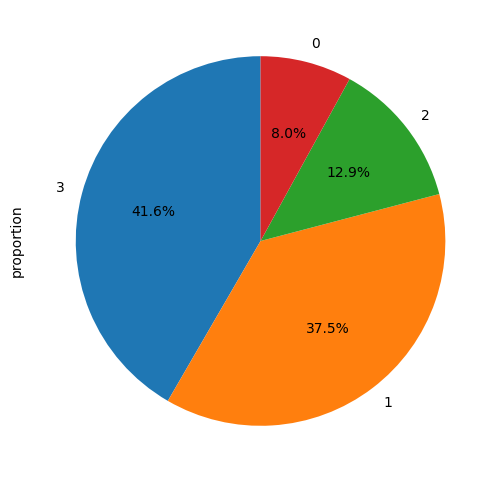

In [68]:
data2 = df['social_support'].value_counts(normalize=True)*100
data2.plot.pie(autopct='%1.1f%%', figsize=(6,6), startangle=90)

The pie chart reveals that the majority of people (over 70%) have either low or high levels of social support, with the largest percentage (41.6%) feeling well-supported. However, around 8% of the population experiences no support, which could be an area of concern. Understanding these different levels of support helps in targeting social or health interventions to the right groups.

### Missing values:

In [70]:
# Check for missing values
missing_values = df.isnull().sum() # This creates a Series containing the count of missing values per column
print("Missing values per column:") # Print a message indicating that missing values will be displayed
print(missing_values[missing_values > 0]) # Filter and print columns that have missing values (greater than 0)

Missing values per column:
Series([], dtype: int64)


### Statistical summaries:

In [71]:
# Calculate statistical summaries (mean, variance, etc.)
stat_summary = df.describe().T  # Transpose the summary for better readability
stat_summary['variance'] = df.var() # Calculate variance for each column and add it to the statistical summary
print(stat_summary[['mean', 'std', 'variance']]) # Display the statistical summary including mean, standard deviation, and variance

                                   mean       std   variance
anxiety_level                 11.063636  6.117558  37.424518
self_esteem                   17.777273  8.944599  80.005852
mental_health_history          0.492727  0.500175   0.250175
depression                    12.555455  7.727008  59.706658
headache                       2.508182  1.409356   1.986284
blood_pressure                 2.181818  0.833575   0.694847
sleep_quality                  2.660000  1.548383   2.397489
breathing_problem              2.753636  1.400713   1.961998
noise_level                    2.603182  1.192194   1.421327
living_conditions              2.516364  1.061016   1.125756
safety                         2.737273  1.406171   1.977317
basic_needs                    2.772727  1.433761   2.055670
academic_performance           2.772727  1.414594   2.001075
study_load                     2.580455  1.183996   1.401847
teacher_student_relationship   2.648182  1.384579   1.917058
future_career_concerns  

# Handling Duplicates

Duplicate rows in a dataset can introduce redundancy, skewing the analysis and leading to inaccurate results. In this step, we checked for and removed any duplicate rows using the duplicated() function. This ensures that each data point is unique, preserving the quality and integrity of the dataset.

In [72]:
# Step 1: Handling Duplicates
# Check for duplicate rows and remove them
num_duplicates = df.duplicated().sum()
print("Number of duplicate rows:", num_duplicates)

# Save the cleaned dataset after removing duplicates (if any)
df.to_csv('Cleaned_StressLevelDataset.csv', index=False)


Number of duplicate rows: 0


 Result:

Upon checking the dataset, the result showed 0 duplicate rows, meaning that no redundant data points were found. The dataset is clean, and no further action regarding duplicates was necessary

# Handling Outliers:

Outliers are extreme values that can impact the accuracy of data analysis. To address this, we used the Interquartile Range (IQR) method, which identifies outliers by looking for values significantly above or below the normal range in numeric columns. Instead of removing these outliers, we cap their values to minimize their influence while preserving the overall dataset structure.

In [73]:
# Step 2: Handling Outliers using the IQR method
# The IQR (Interquartile Range) method is used to detect and cap outliers
outlier_threshold = 1.5  # IQR multiplier for defining outlier boundaries

# Function to count outliers in a given column
def count_outliers(column_data):
    q1 = np.percentile(column_data, 25)  # 25th percentile
    q3 = np.percentile(column_data, 75)  # 75th percentile
    iqr = q3 - q1  # Interquartile range
    upper_bound = q3 + outlier_threshold * iqr  # Upper bound for outliers
    lower_bound = q1 - outlier_threshold * iqr  # Lower bound for outliers
    outliers = (column_data > upper_bound) | (column_data < lower_bound)  # Outlier condition
    return sum(outliers)

# Select only numeric columns for outlier detection
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Initialize a dictionary to store outlier counts
outlier_counts = {}
total_rows_with_outliers = 0

# Loop through each numeric column to calculate outliers
for column in numeric_columns:
    outliers = count_outliers(df[column])
    outlier_counts[column] = outliers
    total_rows_with_outliers += outliers

# Print out the results for each column
print("Outlier Counts:")
for column, count in outlier_counts.items():
    print(f"{column}: {count} rows with outliers")

print(f"Total Rows with Outliers: {total_rows_with_outliers}")


Outlier Counts:
anxiety_level: 0 rows with outliers
self_esteem: 0 rows with outliers
mental_health_history: 0 rows with outliers
depression: 0 rows with outliers
headache: 0 rows with outliers
blood_pressure: 0 rows with outliers
sleep_quality: 0 rows with outliers
breathing_problem: 0 rows with outliers
noise_level: 0 rows with outliers
living_conditions: 0 rows with outliers
safety: 0 rows with outliers
basic_needs: 0 rows with outliers
academic_performance: 0 rows with outliers
study_load: 0 rows with outliers
teacher_student_relationship: 0 rows with outliers
future_career_concerns: 0 rows with outliers
social_support: 0 rows with outliers
peer_pressure: 0 rows with outliers
extracurricular_activities: 0 rows with outliers
bullying: 0 rows with outliers
stress_level: 0 rows with outliers
Total Rows with Outliers: 0


Result:

After applying the IQR method, no outliers were detected in any of the columns, as shown by the result where each column has 0 rows with outliers. This means that the dataset is clean, and no extreme values exist that could distort further analysis or modeling.

# Data Transformation

In the transformation process, Normalization was applied because the data consisted of numerical values that needed to be scaled to a specific range (typically 0 to 1). This ensures that features with different scales do not disproportionately influence machine learning models. Normalization is crucial for algorithms sensitive to the magnitude of data, such as KNN or neural networks.

Encoding was not used because it is only necessary for categorical or textual data. Since the dataset contained numerical data, there was no need for encoding.

In [74]:
from sklearn.preprocessing import MinMaxScaler

# Step 4: Normalization using MinMaxScaler
scaler = MinMaxScaler()
normalized_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Save the normalized dataset
normalized_df.to_csv('normalized_StressLevelDataset.csv', index=False)

# Output a sample of normalized data
print("Data after normalization:")
print(normalized_df.head())


Data after normalization:
   anxiety_level  self_esteem  mental_health_history  depression  headache  \
0       0.666667     0.666667                    0.0    0.407407       0.4   
1       0.714286     0.266667                    1.0    0.555556       1.0   
2       0.571429     0.600000                    1.0    0.518519       0.4   
3       0.761905     0.400000                    1.0    0.555556       0.8   
4       0.761905     0.933333                    0.0    0.259259       0.4   

   blood_pressure  sleep_quality  breathing_problem  noise_level  \
0             0.0            0.4                0.8        0.375   
1             1.0            0.2                0.8        0.625   
2             0.0            0.4                0.4        0.375   
3             1.0            0.2                0.6        0.875   
4             1.0            1.0                0.2        0.625   

   living_conditions  ...  basic_needs  academic_performance  study_load  \
0              0.625

Result:

As seen in the table, the values for variables such as anxiety_level, self_esteem, blood_pressure, and others have been normalized. For example, blood_pressure now ranges between 0 and 1, ensuring consistent scaling across all features. This allows for more balanced analysis and model training without certain features dominating due to larger magnitudes.

# Aggregation

Aggregation is a technique used to summarize data by grouping it based on specific categories. In this step, we grouped the dataset by stress_level and calculated the mean for numeric columns like anxiety_level, depression, and self_esteem. For categorical variables like bullying, we summed the values to provide insight into the total occurrences within each stress level group.


In [75]:
# Step 5: Aggregation based on stress_level
aggregated_df = df.groupby('stress_level').agg({
    'anxiety_level': 'mean',  
    'depression': 'mean',    
    'self_esteem': 'mean',    
    'bullying': 'sum'  # Example of sum for categorical variables
})

# Save the aggregated dataset
aggregated_df.to_csv('aggregated_StressLevelDataset.csv', index=True)

# Output aggregated data
print("Aggregated data:")
print(aggregated_df)


Aggregated data:
              anxiety_level  depression  self_esteem  bullying
stress_level                                                  
0                  5.431635    6.013405    25.252011       468
1                 11.430168   11.874302    19.262570       915
2                 16.401084   19.829268     8.780488      1496


Result:

The aggregated data shows the mean values of anxiety_level, depression, and self_esteem for each stress_level group, as well as the total number of bullying incidents. For instance, individuals with a stress_level of 2 have a higher mean anxiety_level (16.40) and depression (19.83) compared to those with a stress_level of 0. This helps identify patterns and correlations between stress levels and various psychological and behavioral metric

# Discretization

Discretization is a process where continuous data is divided into discrete categories or bins. In this step, we transformed the anxiety_level variable into three categories: Low, Medium, and High. This simplifies the data and makes it easier to analyze trends across different levels of anxiety.

In [76]:

df['anxiety_level_binned'] = pd.cut(df['anxiety_level'], bins=3, labels=['Low', 'Medium', 'High'])


df.to_csv('discretized_StressLevelDataset.csv', index=False)


print("Data after discretization:")
print(df[['anxiety_level', 'anxiety_level_binned']].head())


Data after discretization:
   anxiety_level anxiety_level_binned
0             14               Medium
1             15                 High
2             12               Medium
3             16                 High
4             16                 High


Result:

The anxiety_level column has been discretized into the bins Low, Medium, and High. For example, a anxiety_level of 14 is classified as Medium, while a value of 16 is classified as High. This categorization helps in interpreting the data more intuitively and allows for easier comparisons across different groups.

# Feature Selection
The number of available features is 20, and the feature selection includes blood pressure, sleep quality, future career concerns, bullying, and stress level.
 

In [71]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif 
df = pd.read_csv('Cleaned_StressLevelDataset.csv')

# Read dataset
df = pd.read_csv('Cleaned_StressLevelDataset.csv')

# Separate features from target variable
X = df.drop(columns=['anxiety_level'])
y = df['anxiety_level']

# Check the number of features
n_features = X.shape[1]
print(' Number of features available :', n_features)

# Specify the number of features to choose
num_features_to_select = min(5, n_features)  # Choose the least between 5 and the actual number of features
selector = SelectKBest(score_func=f_classif, k=num_features_to_select)
X_selected = selector.fit_transform(X, y)

# Get selected feature indicators
selected_indices = selector.get_support(indices=True)

# Get selected feature names
selected_features = X.columns[selected_indices]

print('Selected Features:', selected_features)



Selected Features: Index(['blood_pressure', 'sleep_quality', 'future_career_concerns', 'bullying',
       'stress_level'],
      dtype='object')


In [74]:
data['anxiety_level_binned'] = pd.cut(data['anxiety_level'], bins=3, labels=['Low', 'Medium', 'High'])

print("Data after discretization:")
print(data[['anxiety_level', 'anxiety_level_binned']].head())

data.to_csv('cc.csv',index=False)

Correlation coefficients with stress_level:
stress_level                    1.000000
bullying                        0.751162
future_career_concerns          0.742619
anxiety_level                   0.736795
depression                      0.734379
headache                        0.713484
extracurricular_activities      0.692977
peer_pressure                   0.690684
noise_level                     0.689143
study_load                      0.657820
mental_health_history           0.648644
breathing_problem               0.573984
blood_pressure                  0.394200
living_conditions              -0.616766
social_support                 -0.632497
teacher_student_relationship   -0.680163
basic_needs                    -0.708968
safety                         -0.709602
academic_performance           -0.720922
sleep_quality                  -0.749068
self_esteem                    -0.756195
Name: stress_level, dtype: float64
